# Simulate differentiation process

In [1]:
import cospar as cs

cs.settings.verbosity = 1
cs.settings.set_figure_params(
    format="pdf", figsize=[4, 3.5], dpi=100, fontsize=14, pointsize=10
)
# Each dataset should have its folder to avoid conflicts.
cs.settings.data_path = "data_cospar"
cs.settings.figure_path = "fig_cospar"
cs.hf.set_up_folders()

## The bifurcation model with clonal dispersion

In [2]:
L = 10
adata = cs.simulate.bifurcation_model(t1=4, M=50, L=L)

Load existing data


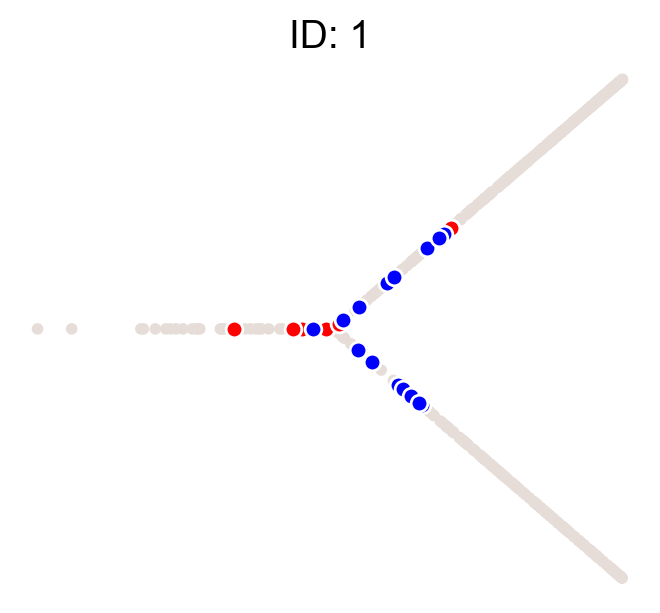

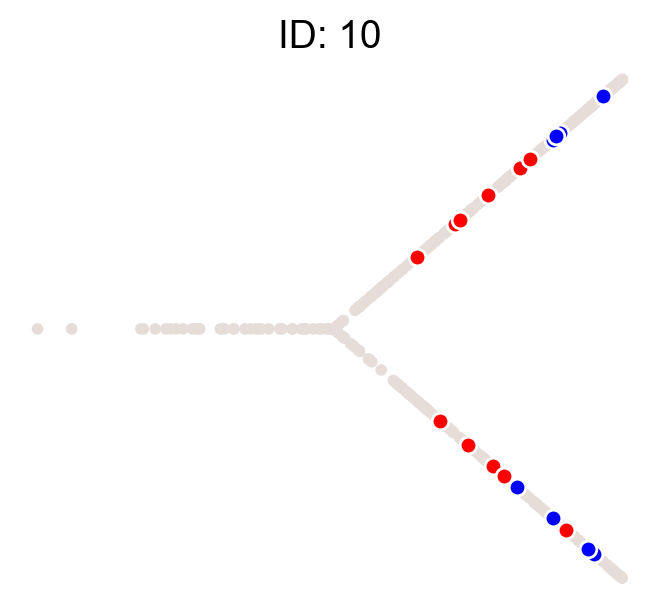

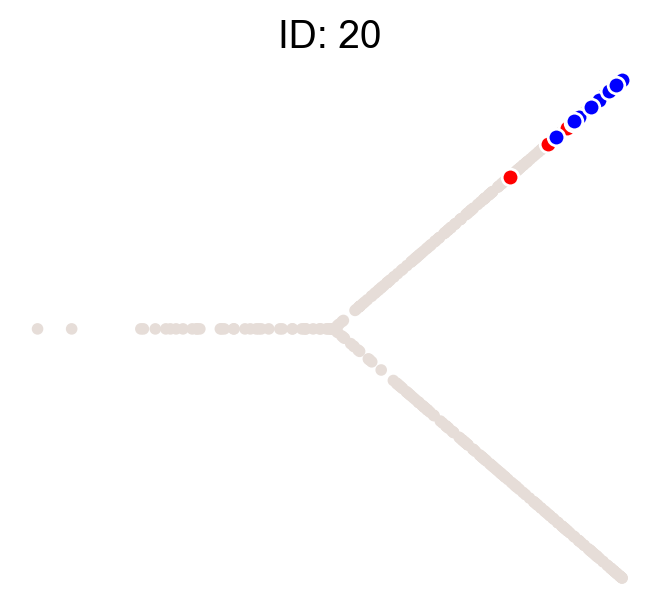

In [3]:
cs.pl.clones_on_manifold(adata, selected_clone_list=[1, 10, 20])

### Using the observed clonal data, no fancy analysis

In [4]:
adata = cs.tmap.infer_Tmap_from_clonal_info_alone(adata, method="naive")
Tmap = adata.uns["clonal_transition_map"]
state_info = adata.obs["state_info"]
cell_id_t1 = adata.uns["Tmap_cell_id_t1"]
cell_id_t2 = adata.uns["Tmap_cell_id_t2"]
correlation_naive = (
    cs.simulate.quantify_correlation_with_ground_truth_fate_bias_BifurcationModel(
        Tmap, state_info, cell_id_t1, cell_id_t2
    )
)
print(
    f"Fate bias correlation from the observed transition map: {correlation_naive:.3f}"
)

Fate bias correlation from the observed transition map: 0.588


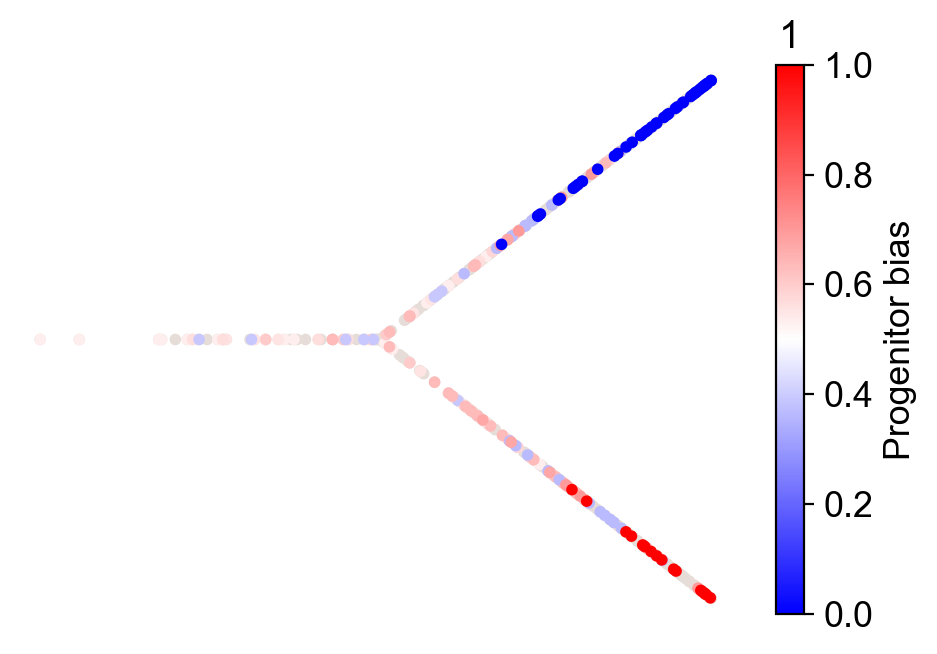

In [5]:
cs.tl.fate_bias(adata, source="clonal_transition_map", selected_fates=["1", "0"])
cs.pl.fate_bias(adata, source="clonal_transition_map", selected_fates=["1", "0"])

### Apply the CoSpar method

In [6]:
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata, smooth_array=[10, 10, 10], compute_new=True
)
Tmap = adata.uns["transition_map"]
state_info = adata.obs["state_info"]
cell_id_t1 = adata.uns["Tmap_cell_id_t1"]
cell_id_t2 = adata.uns["Tmap_cell_id_t2"]
correlation_cospar = (
    cs.simulate.quantify_correlation_with_ground_truth_fate_bias_BifurcationModel(
        Tmap, state_info, cell_id_t1, cell_id_t2
    )
)
print(
    f"Fate bias correlation from the predicted transition map: {correlation_cospar:.3f}"
)

Fate bias correlation from the predicted transition map: 0.945


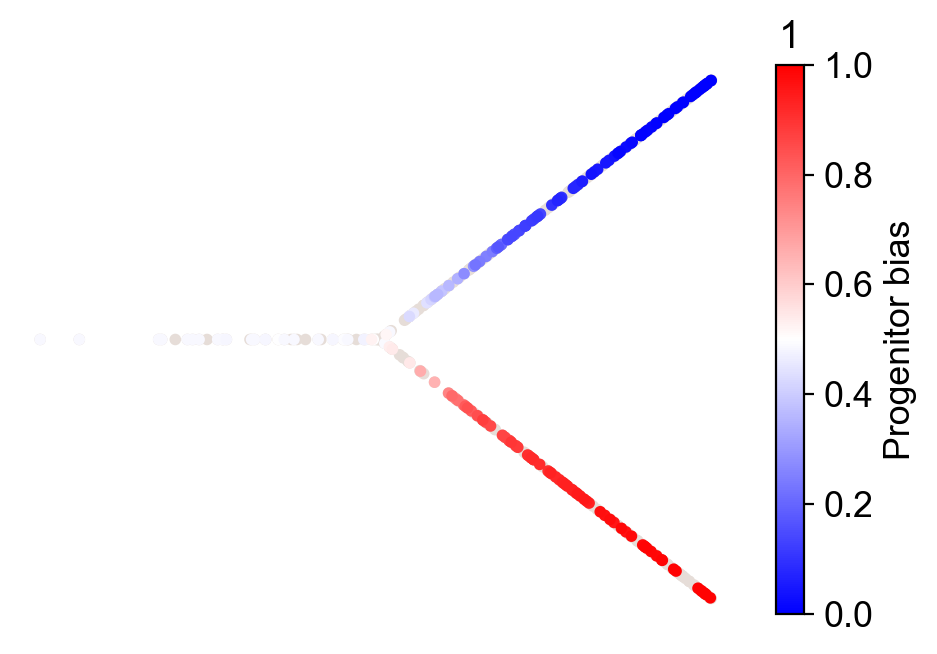

In [7]:
cs.tl.fate_bias(adata, source="transition_map", selected_fates=["1", "0"])
cs.pl.fate_bias(adata, source="transition_map", selected_fates=["1", "0"])

## Linear differentiation under barcode homoplasy

In [8]:
adata = cs.simulate.linear_differentiation_model(
    Nt1=400, progeny_N=1, used_clone_N=100, always_simulate_data=True
)

Generate new data
Time elapsed for generating clonal data:  0.2516930103302002
Generate mixing matrix


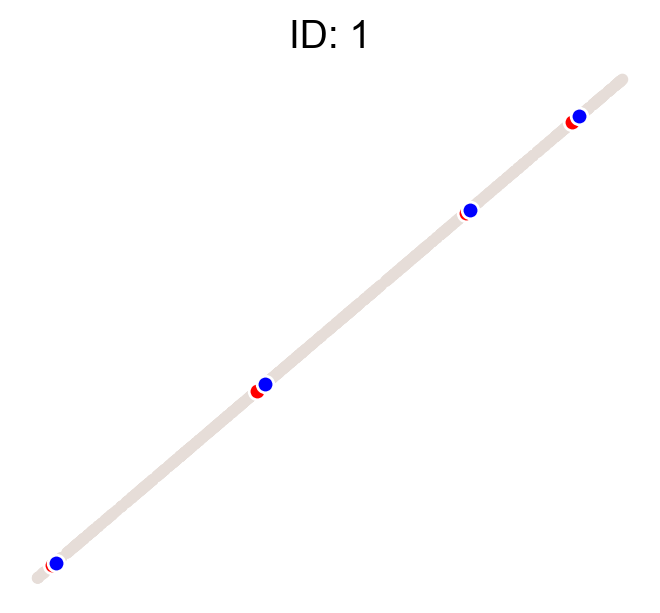

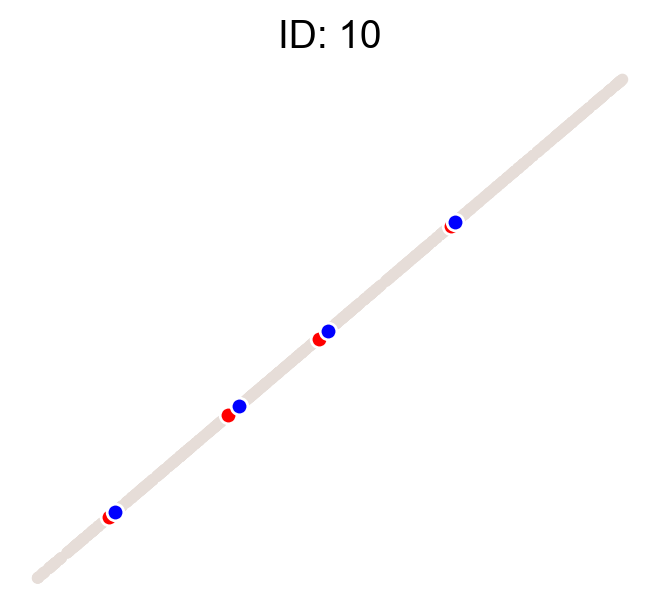

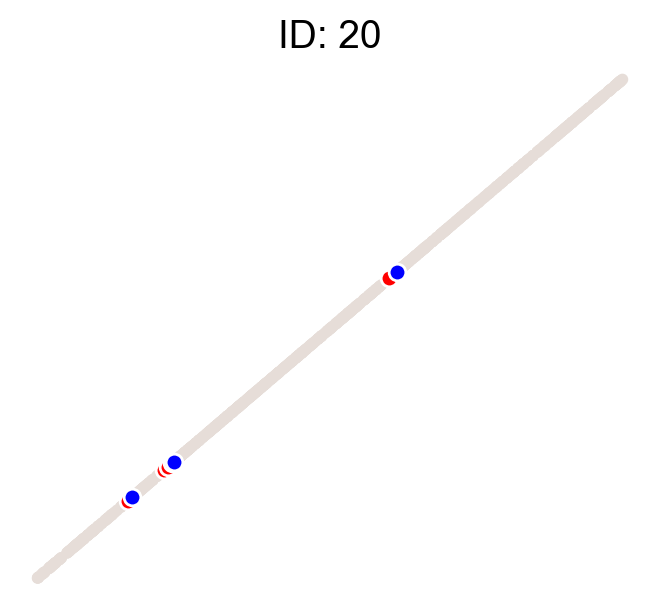

In [9]:
cs.pl.clones_on_manifold(adata, selected_clone_list=[1, 10, 20])

### Using the observed clonal data, no fancy method

True positive rate for the observed transition map: 0.300


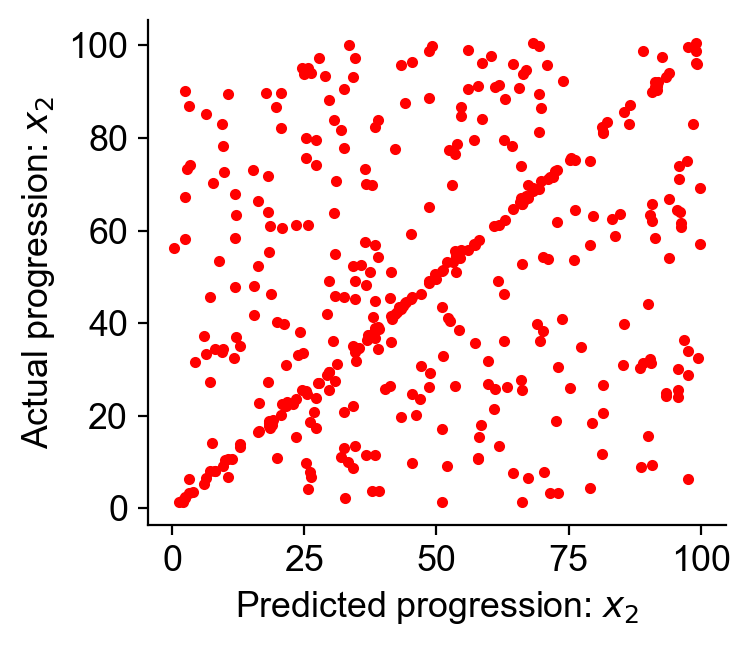

In [10]:
adata = cs.tmap.infer_Tmap_from_clonal_info_alone(adata, method="naive")
Tmap = adata.uns["clonal_transition_map"]
state_info = adata.obs["state_info"]
cell_id_t1 = adata.uns["Tmap_cell_id_t1"]
cell_id_t2 = adata.uns["Tmap_cell_id_t2"]

X_t1 = adata.obsm["X_orig"][cell_id_t1]
X_t2 = adata.obsm["X_orig"][cell_id_t2]
TPR_naive = cs.simulate.quantify_transition_peak_TPR_LinearDifferentiation(
    Tmap, X_t1, X_t2
)
print(f"True positive rate for the observed transition map: {TPR_naive:.3f}")

### Apply CoSpar

True positive rate for the predicted transition map: 0.833


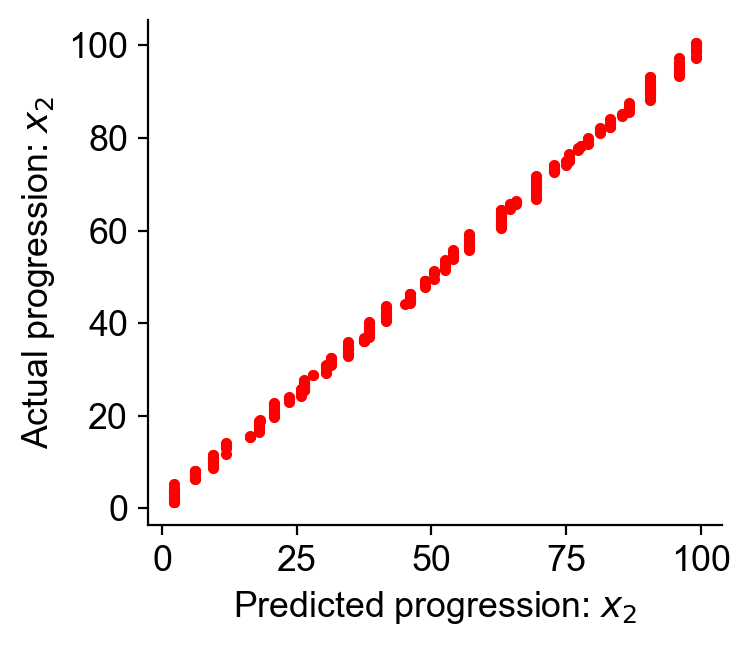

In [11]:
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata, smooth_array=[10, 10, 10], compute_new=True
)
Tmap = adata.uns["transition_map"]
state_info = adata.obs["state_info"]
cell_id_t1 = adata.uns["Tmap_cell_id_t1"]
cell_id_t2 = adata.uns["Tmap_cell_id_t2"]

X_t1 = adata.obsm["X_orig"][cell_id_t1]
X_t2 = adata.obsm["X_orig"][cell_id_t2]
TPR_cospar = cs.simulate.quantify_transition_peak_TPR_LinearDifferentiation(
    Tmap, X_t1, X_t2
)
print(f"True positive rate for the predicted transition map: {TPR_cospar:.3f}")